In [2]:
from sklearn import cluster  # machine learning
import pandas as pd
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
import ystockquote as ys  # stock prices  conda install -c https://conda.anaconda.org/roettm ystockquote
%pylab inline
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(15, 5)
rcParams['figure.figsize'] = (13, 6)  # default figure size
symbols = array(['GOOG','AAPL','AMZN','INTC','CTSH','BIDU'])
           

Python version 3.4.4 |Anaconda 2.1.0 (x86_64)| (default, Jan  9 2016, 17:30:09) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.18.0
Populating the interactive namespace from numpy and matplotlib


/Users/dilip/anaconda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:3066: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
stock_df = pd.DataFrame({
             symbol: {
                 date: quote['Adj Close'] 
                 for date, quote in ys.get_historical_prices(symbol, '2006-01-01', '2016-03-23').items()
             }
             for symbol in symbols
         }, columns=symbols, dtype=float)
stock_df.tail()

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
2016-03-17,737.780029,105.800003,559.440002,31.98,58.730000,183.440002
2016-03-18,737.599976,105.919998,552.080017,32.68,59.250000,187.919998
2016-03-21,742.090027,105.910004,553.979980,32.34,59.520000,187.119995
2016-03-22,740.750000,106.720001,560.479980,32.32,58.849998,188.399994
2016-03-23,738.059998,106.129997,569.630005,32.00,59.060001,183.839996


In [4]:
stock_df.head()

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
2006-01-03,217.397972,9.889311,47.580002,18.785440,12.6675,6.350
2006-01-04,222.397983,9.918416,47.250000,19.035227,12.7450,6.630
2006-01-05,225.394994,9.840360,47.650002,19.299707,12.5725,6.620
2006-01-06,232.597803,10.094373,47.869999,19.329093,12.8375,6.584
2006-01-09,233.217191,10.061298,47.080002,19.446640,13.0625,6.613


In [5]:
#  Remove NAN values if there is any 
stock_df.dropna(inplace=True)
stock_df.head()

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
2006-01-03,217.397972,9.889311,47.580002,18.785440,12.6675,6.350
2006-01-04,222.397983,9.918416,47.250000,19.035227,12.7450,6.630
2006-01-05,225.394994,9.840360,47.650002,19.299707,12.5725,6.620
2006-01-06,232.597803,10.094373,47.869999,19.329093,12.8375,6.584
2006-01-09,233.217191,10.061298,47.080002,19.446640,13.0625,6.613


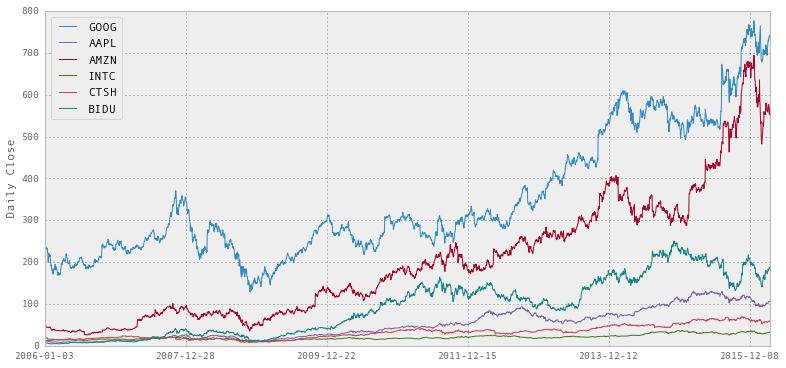

In [6]:
#stock_df[['GOOG', 'AAPL', 'AMZN','INTC','CTSH','BIDU']].plot()  
stock_df.plot()
ylabel('Daily Close')

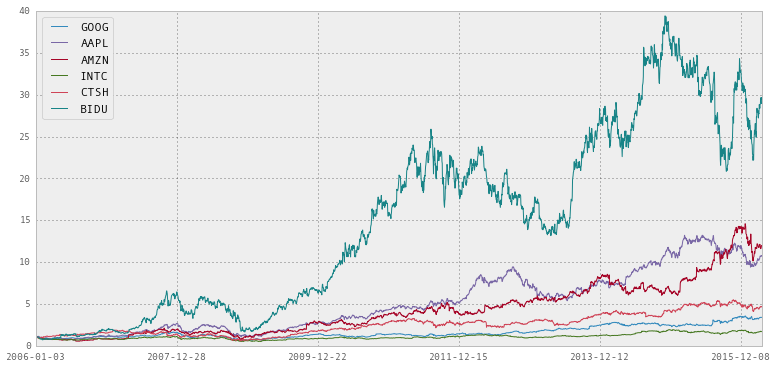

In [7]:
# Plot stock prices normalized from Day 1.

prices_norm = stock_df.copy()
for symbol in symbols:
    prices_norm[symbol] = stock_df[symbol]/stock_df[symbol][0]
prices_norm[['GOOG', 'AAPL', 'AMZN','INTC','CTSH','BIDU']].plot()

(0.81212346330487917, 30)

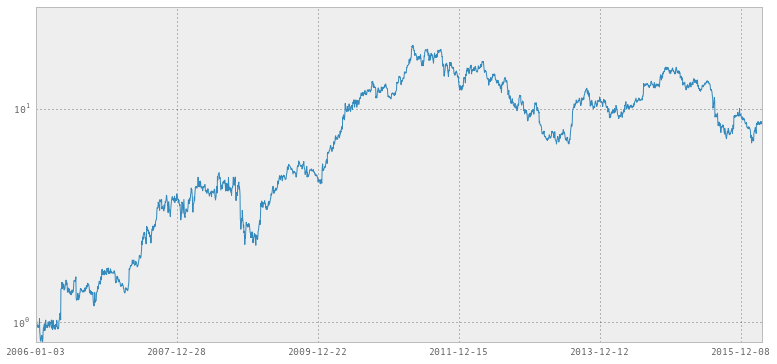

In [8]:
'''
Plot the ratio BIDU/GOOG.
'''
(prices_norm.BIDU/prices_norm.GOOG).plot(logy=True)
ylim(-0.5, 30)

(0.85699577185928066, 30)

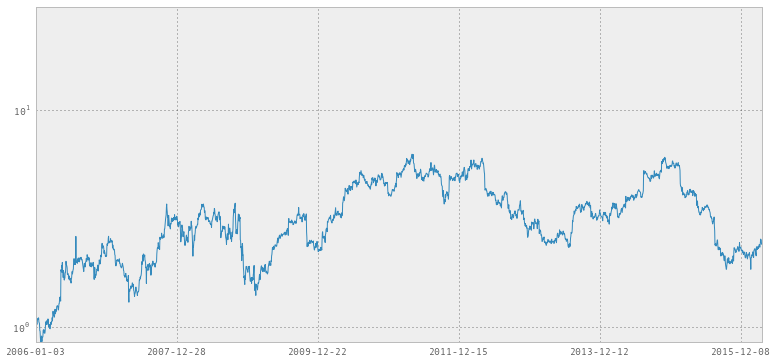

In [9]:
'''
Plot the ratio BIDU/AMZN.
'''
(prices_norm.BIDU/prices_norm.AMZN).plot(logy=True)
ylim(-0.5, 30)

(0.23906513578965852, 5)

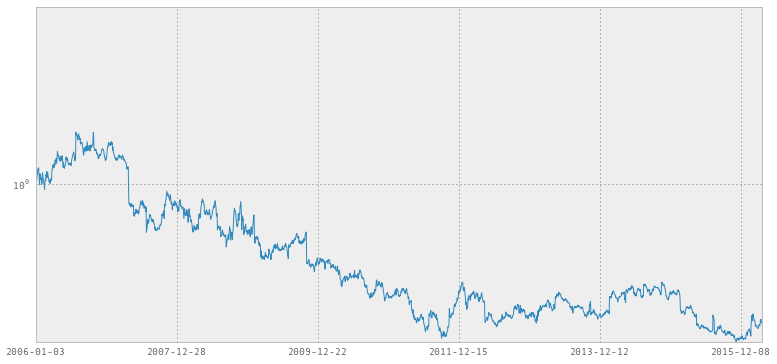

In [10]:
'''
Plot the ratio GOOG/AMZN.
'''
(prices_norm.GOOG/prices_norm.AMZN).plot(logy=True)
ylim(-1.0, 5)

In [11]:
'''
Compute the daily percent change for all stocks.
'''
stock_df.pct_change().tail()

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
2016-03-17,0.002296,-0.001604,-0.025824,0.009151,-0.003056,0.002131
2016-03-18,-0.000244,0.001134,-0.013156,0.021889,0.008854,0.024422
2016-03-21,0.006087,-0.000094,0.003441,-0.010404,0.004557,-0.004257
2016-03-22,-0.001806,0.007648,0.011733,-0.000618,-0.011257,0.006841
2016-03-23,-0.003631,-0.005529,0.016325,-0.009901,0.003568,-0.024204


In [12]:
# Statistical info on the daily percent change
stock_df.pct_change().describe()

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
count,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000
mean,0.000665,0.001156,0.001316,0.000384,0.000890,0.001854
std,0.019564,0.021547,0.026681,0.018824,0.024103,0.033208
min,-0.116091,-0.179195,-0.218220,-0.123843,-0.192123,-0.250433
25%,-0.008259,-0.009348,-0.011143,-0.009316,-0.010458,-0.014749
50%,0.000161,0.000926,0.000142,0.000476,0.000196,0.000473
75%,0.009661,0.012308,0.013494,0.009907,0.012445,0.018011
max,0.199915,0.139050,0.269497,0.118499,0.187788,0.368198


In [13]:
# Compute the correlation between each pair of ETFs.¶
correlation = stock_df.pct_change().corr()
correlation

,GOOG,AAPL,AMZN,INTC,CTSH,BIDU
GOOG,1.000000,0.506339,0.496754,0.451562,0.450786,0.475707
AAPL,0.506339,1.000000,0.415265,0.466205,0.449024,0.413080
AMZN,0.496754,0.415265,1.000000,0.415892,0.408288,0.409673
INTC,0.451562,0.466205,0.415892,1.000000,0.522817,0.378158
CTSH,0.450786,0.449024,0.408288,0.522817,1.000000,0.394135
BIDU,0.475707,0.413080,0.409673,0.378158,0.394135,1.000000


In [14]:
_, labels = cluster.affinity_propagation(correlation)
for label in range(max(labels)+1):
    print(label, symbols[labels==label])

0 ['GOOG' 'AAPL' 'AMZN' 'BIDU']
1 ['INTC' 'CTSH']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c272e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ca6fda0>]], dtype=object)

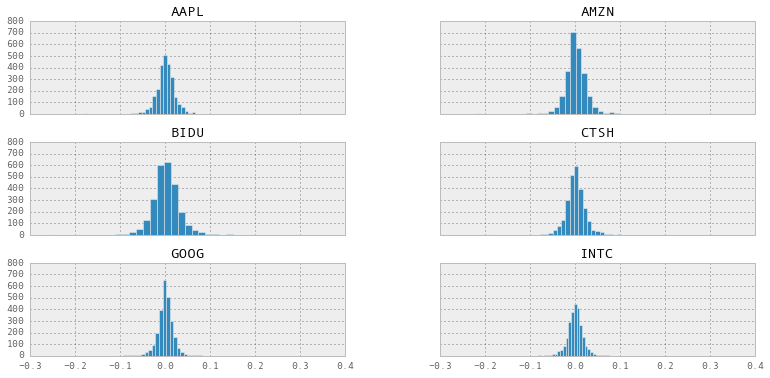

In [15]:
'''

Plot histograms of the daily percent change.

We find that the daily percent change is roughly Gaussian, which implies that the 
daily change follows a log-normal distribution.

'''

stock_df.pct_change().hist(column=['GOOG', 'AAPL', 'AMZN','INTC','CTSH','BIDU'], bins=40, sharex=True, sharey=True)


/Users/dilip/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


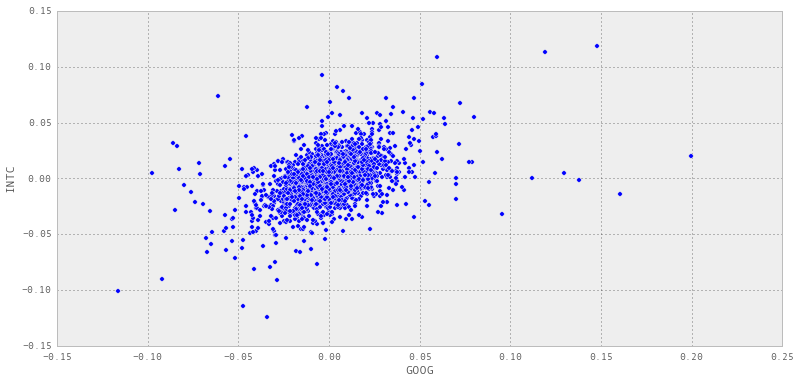

In [16]:
scatter(stock_df.GOOG.pct_change(), stock_df.INTC.pct_change())
xlabel('GOOG')
ylabel('INTC')

/Users/dilip/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


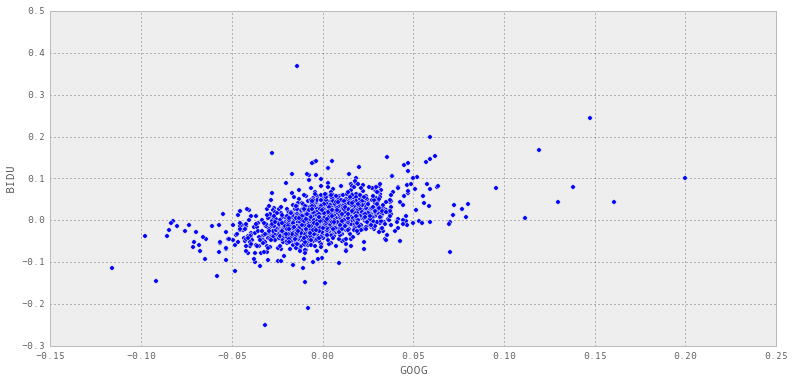

In [17]:
scatter(stock_df.GOOG.pct_change(), stock_df.BIDU.pct_change())
xlabel('GOOG')
ylabel('BIDU')

/Users/dilip/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


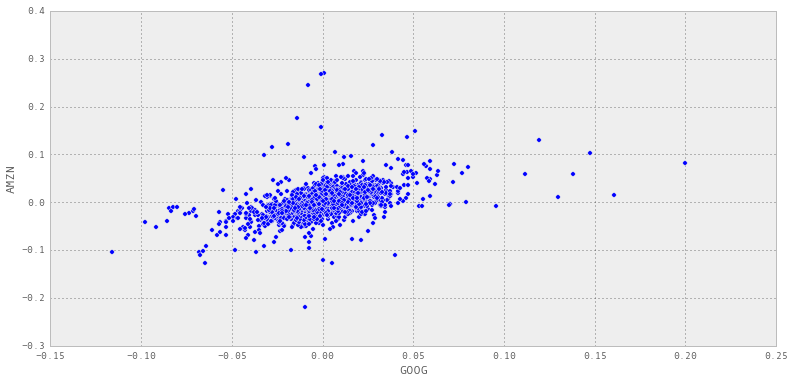

In [18]:
scatter(stock_df.GOOG.pct_change(), stock_df.AMZN.pct_change())
xlabel('GOOG')
ylabel('AMZN')

In [19]:
# assuming you use these proportions on day 1
portfolio = 0.5*prices_norm.BIDU + 0.3*prices_norm.GOOG + 0.2*prices_norm.AMZN
portfolio.pct_change().describe()


count    2572.000000
mean        0.001511
std         0.027981
min        -0.204831
25%        -0.012731
50%         0.000583
75%         0.015711
max         0.218704
dtype: float64

In [20]:
(0.8*prices_norm.GOOG + 0.2).pct_change().describe()

count    2572.000000
mean        0.000545
std         0.016143
min        -0.092693
25%        -0.006916
50%         0.000142
75%         0.008207
max         0.160957
Name: GOOG, dtype: float64

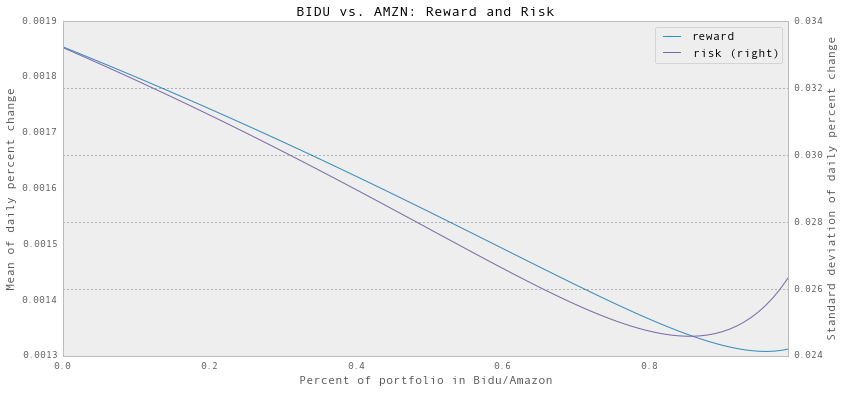

In [21]:
pct_GOOG = linspace(0, 1, 100, endpoint=False)
BIDU_AMZN = pd.DataFrame({
    'reward': pd.Series([(r*prices_norm.AMZN + (1-r)*prices_norm.BIDU).pct_change().mean() for r in pct_GOOG], index=pct_GOOG),
    'risk': pd.Series([(r*prices_norm.AMZN + (1-r)*prices_norm.BIDU).pct_change().std() for r in pct_GOOG], index=pct_GOOG)
})
ax = BIDU_AMZN.plot(secondary_y='risk')
ax.set_xlabel('Percent of portfolio in Bidu/Amazon')
ax.set_ylabel('Mean of daily percent change')
ax.right_ax.set_ylabel('Standard deviation of daily percent change')
title('BIDU vs. AMZN: Reward and Risk')

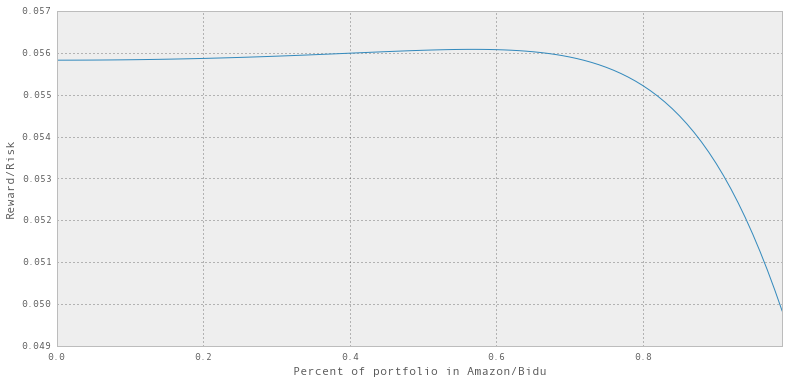

In [22]:
reward_over_risk = BIDU_AMZN.reward/BIDU_AMZN.risk
reward_over_risk.plot()
xlabel('Percent of portfolio in Amazon/Bidu')
ylabel('Reward/Risk')